In [527]:
import yfinance as yf
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,GRU,Dense,TimeDistributed, Dropout, Reshape

In [528]:
pip install keras.preprocessing


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [529]:
#Step 1: importing dataset
Nifty50_df=pd.read_csv('/Users/drago/Documents/Practicefiles/Data_files/Stock market data/Apr 2024-2025/NIFTY 50-13-04-2024-to-13-04-2025.csv',parse_dates=True,names=['Dates','Open','High','Low','Close'],header=0,usecols=[0,1,2,3,4],keep_default_na=True,na_values="-")
Nifty50_df['Dates']=pd.to_datetime(Nifty50_df['Dates'])
Nifty50_df.head(5)

/var/folders/1n/shv850h12fz67s4gch3dzjbr0000gn/T/ipykernel_87736/115539570.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Nifty50_df['Dates']=pd.to_datetime(Nifty50_df['Dates'])


,Dates,Open,High,Low,Close
0,2024-04-15,22339.05,22427.45,22259.55,22272.50
1,2024-04-16,22125.30,22213.75,22079.45,22147.90
2,2024-04-18,22212.35,22326.50,21961.70,21995.85
3,2024-04-19,21861.50,22179.55,21777.65,22147.00
4,2024-04-22,22336.90,22375.65,22198.15,22336.40


In [530]:
NiftyAuto_df=pd.read_csv('/Users/drago/Documents/Practicefiles/Data_files/Stock market data/Apr 2024-2025/NIFTY AUTO-13-04-2024-to-13-04-2025.csv',parse_dates=True,names=['Dates','Open','High','Low','Close'],header=0,usecols=[0,1,2,3,4],keep_default_na=True,na_values="-")
NiftyAuto_df['Dates']=pd.to_datetime(NiftyAuto_df['Dates'])
NiftyAuto_df.head(5)

/var/folders/1n/shv850h12fz67s4gch3dzjbr0000gn/T/ipykernel_87736/782334765.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  NiftyAuto_df['Dates']=pd.to_datetime(NiftyAuto_df['Dates'])


,Dates,Open,High,Low,Close
0,2024-04-15,21623.60,21818.85,21445.00,21680.30
1,2024-04-16,21536.90,21845.10,21480.75,21703.05
2,2024-04-18,21790.75,21948.50,21459.05,21520.75
3,2024-04-19,21483.30,21637.10,21144.75,21609.70
4,2024-04-22,21846.05,21854.20,21653.75,21812.70


In [531]:
df=Nifty50_df.merge(NiftyAuto_df,on='Dates',how='right')
df.columns=["Dates",'Open_50','High_50','Low_50','Close_50','Open_Auto','High_Auto','Low_Auto','Close_Auto']
df

,Dates,Open_50,High_50,Low_50,Close_50,Open_Auto,High_Auto,Low_Auto,Close_Auto
0,2024-04-15,22339.05,22427.45,22259.55,22272.50,21623.60,21818.85,21445.00,21680.30
1,2024-04-16,22125.30,22213.75,22079.45,22147.90,21536.90,21845.10,21480.75,21703.05
2,2024-04-18,22212.35,22326.50,21961.70,21995.85,21790.75,21948.50,21459.05,21520.75
3,2024-04-19,21861.50,22179.55,21777.65,22147.00,21483.30,21637.10,21144.75,21609.70
4,2024-04-22,22336.90,22375.65,22198.15,22336.40,21846.05,21854.20,21653.75,21812.70
...,...,...,...,...,...,...,...,...,...
243,2025-04-04,23190.40,23214.70,22857.45,22904.45,21081.05,21081.05,20507.55,20593.15
244,2025-04-07,21758.40,22254.00,21743.65,22161.60,19336.15,19893.70,19316.65,19815.55
245,2025-04-08,22446.75,22697.20,22270.85,22535.85,20141.65,20307.30,19805.25,20138.15
246,2025-04-09,22460.30,22468.70,22353.25,22399.15,20188.30,20326.95,20034.65,20140.40


In [532]:
NiftyCommondities_df=pd.read_csv('/Users/drago/Documents/Practicefiles/Data_files/Stock market data/Apr 2024-2025/NIFTY COMMODITIES-13-04-2024-to-13-04-2025.csv',parse_dates=True,names=['Dates','Open','High','Low','Close'],header=0,usecols=[0,1,2,3,4],keep_default_na=True,na_values="-")
NiftyCommondities_df['Dates']=pd.to_datetime(NiftyCommondities_df['Dates'])
NiftyCommondities_df.head(5)


/var/folders/1n/shv850h12fz67s4gch3dzjbr0000gn/T/ipykernel_87736/3234922492.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  NiftyCommondities_df['Dates']=pd.to_datetime(NiftyCommondities_df['Dates'])


,Dates,Open,High,Low,Close
0,2024-04-15,8560.4,8684.65,8452.10,8587.85
1,2024-04-16,8553.4,8645.05,8512.00,8590.80
2,2024-04-18,8651.8,8694.85,8494.40,8521.25
3,2024-04-19,8442.5,8565.95,8370.25,8538.40
4,2024-04-22,8627.0,8632.05,8567.75,8581.35


In [533]:
df=df.merge(NiftyCommondities_df,on='Dates',how='right')
df.columns=["Dates",'Open_50','High_50','Low_50','Close_50','Open_Auto','High_Auto','Low_Auto','Close_Auto','Open_Com','High_Com','Low_Com','Close_Com']
df

,Dates,Open_50,High_50,Low_50,Close_50,Open_Auto,High_Auto,Low_Auto,Close_Auto,Open_Com,High_Com,Low_Com,Close_Com
0,2024-04-15,22339.05,22427.45,22259.55,22272.50,21623.60,21818.85,21445.00,21680.30,8560.40,8684.65,8452.10,8587.85
1,2024-04-16,22125.30,22213.75,22079.45,22147.90,21536.90,21845.10,21480.75,21703.05,8553.40,8645.05,8512.00,8590.80
2,2024-04-18,22212.35,22326.50,21961.70,21995.85,21790.75,21948.50,21459.05,21520.75,8651.80,8694.85,8494.40,8521.25
3,2024-04-19,21861.50,22179.55,21777.65,22147.00,21483.30,21637.10,21144.75,21609.70,8442.50,8565.95,8370.25,8538.40
4,2024-04-22,22336.90,22375.65,22198.15,22336.40,21846.05,21854.20,21653.75,21812.70,8627.00,8632.05,8567.75,8581.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2025-04-04,23190.40,23214.70,22857.45,22904.45,21081.05,21081.05,20507.55,20593.15,8433.65,8437.50,8120.95,8150.80
244,2025-04-07,21758.40,22254.00,21743.65,22161.60,19336.15,19893.70,19316.65,19815.55,7607.70,7878.70,7601.40,7849.60
245,2025-04-08,22446.75,22697.20,22270.85,22535.85,20141.65,20307.30,19805.25,20138.15,7997.65,8055.20,7867.25,7980.70
246,2025-04-09,22460.30,22468.70,22353.25,22399.15,20188.30,20326.95,20034.65,20140.40,7956.00,7959.95,7864.70,7939.65


In [534]:
NiftyCD_df=pd.read_csv('/Users/drago/Documents/Practicefiles/Data_files/Stock market data/Apr 2024-2025/NIFTY CONSUMER DURABLES-13-04-2024-to-13-04-2025.csv',parse_dates=True,names=['Dates','Open','High','Low','Close'],header=0,usecols=[0,1,2,3,4],keep_default_na=True,na_values="-")
NiftyCD_df['Dates']=pd.to_datetime(NiftyCD_df['Dates'])
df=df.merge(NiftyCD_df,on='Dates',how='right')
df.columns=["Dates",'Open_50','High_50','Low_50','Close_50','Open_Auto','High_Auto','Low_Auto','Close_Auto','Open_Com','High_Com','Low_Com','Close_Com','Open_CD','High_CD','Low_CD','Close_CD']
df.sample(3)

/var/folders/1n/shv850h12fz67s4gch3dzjbr0000gn/T/ipykernel_87736/886324578.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  NiftyCD_df['Dates']=pd.to_datetime(NiftyCD_df['Dates'])


,Dates,Open_50,High_50,Low_50,Close_50,Open_Auto,High_Auto,Low_Auto,Close_Auto,Open_Com,High_Com,Low_Com,Close_Com,Open_CD,High_CD,Low_CD,Close_CD
220,2025-02-28,22433.40,22450.35,22104.85,22124.70,21180.80,21188.20,20460.10,20498.60,7679.10,7681.70,7549.50,7595.80,35017.0,35106.80,34192.00,34458.85
69,2024-07-25,24230.95,24426.15,24210.80,24406.10,25210.70,25640.40,25147.35,25627.35,9168.15,9307.30,9124.95,9286.55,38579.0,38863.40,38473.30,38634.55
241,2025-04-02,23192.60,23350.00,23158.45,23332.35,21250.85,21433.45,21175.85,21408.85,8419.50,8452.75,8332.90,8445.45,34896.8,35675.45,34589.75,35633.70


In [535]:
NiftyEnergy_df=pd.read_csv('/Users/drago/Documents/Practicefiles/Data_files/Stock market data/Apr 2024-2025/NIFTY ENERGY-13-04-2024-to-13-04-2025.csv',parse_dates=True,names=['Dates','Open','High','Low','Close'],header=0,usecols=[0,1,2,3,4],keep_default_na=True,na_values="-")
NiftyEnergy_df['Dates']=pd.to_datetime(NiftyEnergy_df['Dates'])
df=df.merge(NiftyEnergy_df,on='Dates',how='right')
df.columns=["Dates",'Open_50','High_50','Low_50','Close_50','Open_Auto','High_Auto','Low_Auto','Close_Auto','Open_Com','High_Com','Low_Com','Close_Com','Open_CD','High_CD','Low_CD','Close_CD','Open_En','High_En','Low_En','Close_En']
df.sample(3)

/var/folders/1n/shv850h12fz67s4gch3dzjbr0000gn/T/ipykernel_87736/1539274480.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  NiftyEnergy_df['Dates']=pd.to_datetime(NiftyEnergy_df['Dates'])


,Dates,Open_50,High_50,Low_50,Close_50,Open_Auto,High_Auto,Low_Auto,Close_Auto,Open_Com,...,Low_Com,Close_Com,Open_CD,High_CD,Low_CD,Close_CD,Open_En,High_En,Low_En,Close_En
41,2024-06-13,23480.95,23481.05,23353.90,23398.90,25482.30,25482.30,25162.5,25393.2,9233.65,...,9114.40,9168.15,37201.95,37567.30,37020.65,37529.9,41357.70,41357.70,40803.45,40943.25
208,2025-02-11,23383.55,23390.05,22986.65,23071.80,23053.80,23068.15,22531.1,22573.9,7927.05,...,7774.80,7808.20,37585.05,37660.45,36524.30,36715.1,32156.65,32157.75,31217.70,31436.75
106,2024-09-17,25416.90,25441.65,25352.25,25418.55,25903.35,25942.90,25602.2,25896.4,9428.50,...,9367.45,9415.30,43435.50,43561.90,43001.80,43511.5,42592.15,42714.65,42390.25,42648.80


In [536]:
NiftyFS_df=pd.read_csv('/Users/drago/Documents/Practicefiles/Data_files/Stock market data/Apr 2024-2025/NIFTY FINANCIAL SERVICES 25_50-13-04-2024-to-13-04-2025.csv',parse_dates=True,names=['Dates','Open','High','Low','Close'],header=0,usecols=[0,1,2,3,4],keep_default_na=True,na_values="-")
NiftyFS_df['Dates']=pd.to_datetime(NiftyFS_df['Dates'])
df=df.merge(NiftyFS_df,on='Dates',how='right')
df.columns=["Dates",'Open_50','High_50','Low_50','Close_50','Open_Auto','High_Auto','Low_Auto','Close_Auto','Open_Com','High_Com','Low_Com','Close_Com','Open_CD','High_CD','Low_CD','Close_CD','Open_En','High_En','Low_En','Close_En','Open_FS','High_FS','Low_FS','Close_FS']
df.sample(3)

/var/folders/1n/shv850h12fz67s4gch3dzjbr0000gn/T/ipykernel_87736/2030325484.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  NiftyFS_df['Dates']=pd.to_datetime(NiftyFS_df['Dates'])


,Dates,Open_50,High_50,Low_50,Close_50,Open_Auto,High_Auto,Low_Auto,Close_Auto,Open_Com,...,Low_CD,Close_CD,Open_En,High_En,Low_En,Close_En,Open_FS,High_FS,Low_FS,Close_FS
210,2025-02-13,23055.75,23235.50,22992.20,23031.40,22483.25,22594.65,22285.10,22344.30,7829.15,...,36169.15,36347.25,31378.00,31734.15,31213.55,31286.80,24769.9,25153.55,24748.35,24919.5
185,2025-01-10,23551.90,23596.60,23344.35,23431.50,23262.30,23345.85,22896.05,23017.75,8001.40,...,40524.10,40585.10,34484.10,34536.90,33657.10,33743.00,24811.0,24850.85,24390.10,24436.6
64,2024-07-18,24543.80,24837.75,24504.45,24800.85,25457.40,25605.50,25162.70,25576.70,9470.50,...,37865.45,38339.60,43328.55,43365.45,42734.85,43236.65,25819.6,26127.35,25765.50,26086.2


In [537]:
NiftyFMCG_df=pd.read_csv('/Users/drago/Documents/Practicefiles/Data_files/Stock market data/Apr 2024-2025/NIFTY FMCG-13-04-2024-to-13-04-2025.csv',parse_dates=True,names=['Dates','Open','High','Low','Close'],header=0,usecols=[0,1,2,3,4],keep_default_na=True,na_values="-")
NiftyFMCG_df['Dates']=pd.to_datetime(NiftyFMCG_df['Dates'])
df=df.merge(NiftyFMCG_df,on='Dates',how='right')
df.columns=["Dates",'Open_50','High_50','Low_50','Close_50','Open_Auto','High_Auto','Low_Auto','Close_Auto','Open_Com','High_Com','Low_Com','Close_Com','Open_CD','High_CD','Low_CD','Close_CD','Open_En','High_En','Low_En','Close_En','Open_FS','High_FS','Low_FS','Close_FS','Open_FMCG','High_FMCG','Low_FMCG','Close_FMCG']
df.sample(3)

/var/folders/1n/shv850h12fz67s4gch3dzjbr0000gn/T/ipykernel_87736/3379244968.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  NiftyFMCG_df['Dates']=pd.to_datetime(NiftyFMCG_df['Dates'])


,Dates,Open_50,High_50,Low_50,Close_50,Open_Auto,High_Auto,Low_Auto,Close_Auto,Open_Com,...,Low_En,Close_En,Open_FS,High_FS,Low_FS,Close_FS,Open_FMCG,High_FMCG,Low_FMCG,Close_FMCG
165,2024-12-12,24604.45,24675.25,24527.95,24548.7,23891.8,23908.1,23615.3,23660.30,8765.8,...,36990.65,37024.95,26626.00,26728.75,26555.50,26592.7,56701.15,56885.75,56059.55,56146.70
178,2025-01-01,23637.65,23822.80,23562.80,23742.9,22834.2,23167.4,22689.2,23139.55,8114.4,...,35076.55,35430.45,25112.40,25288.95,24974.75,25226.5,56884.05,57129.90,56767.35,57017.65
144,2024-11-11,24087.25,24336.80,24004.60,24141.3,23740.2,24077.1,23618.3,23729.45,8746.1,...,38049.95,38247.45,25769.45,26139.60,25630.10,25927.5,58327.15,58533.25,57575.15,57843.95


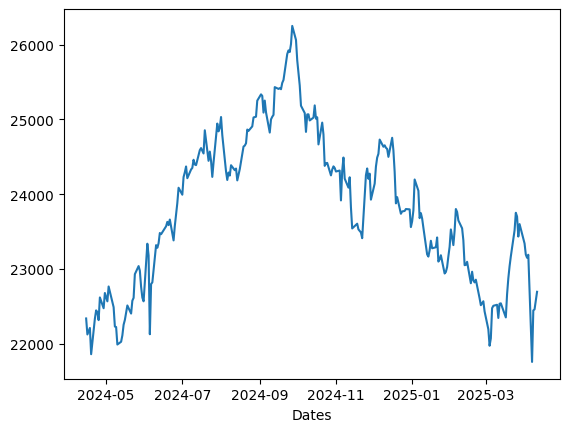

In [539]:
#Checking for trend
plt.plot(Nifty50_df.iloc[:,0],Nifty50_df.iloc[:,1])
plt.xlabel('Dates')
plt.show()

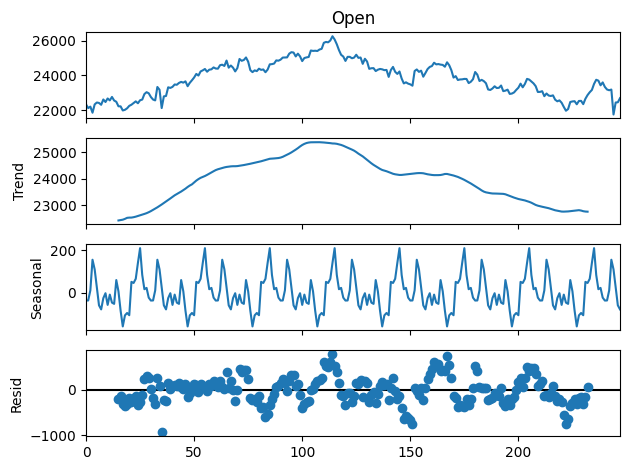

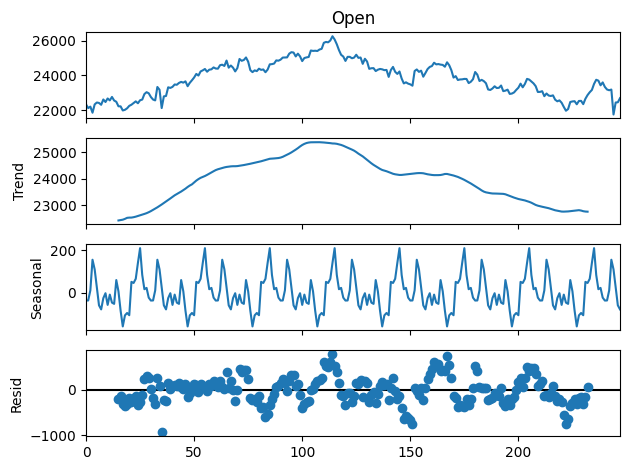

In [540]:
#Checking for seasonality
results=seasonal_decompose(Nifty50_df['Open'],model='additive',period=30)
results.plot()

In [543]:
#Step 3:train test split
train=df[:200]
test=df[200:]


In [544]:
train.sample()

,Dates,Open_50,High_50,Low_50,Close_50,Open_Auto,High_Auto,Low_Auto,Close_Auto,Open_Com,...,Low_En,Close_En,Open_FS,High_FS,Low_FS,Close_FS,Open_FMCG,High_FMCG,Low_FMCG,Close_FMCG
145,2024-11-12,24225.8,24242.0,23839.15,23883.45,23744.7,23865.6,23183.75,23269.1,8713.45,...,37613.3,37705.65,26027.65,26095.75,25463.0,25519.35,57925.15,57960.05,56796.45,56902.55


In [545]:
#Step 4: Scaling the data using MinMax scaler
scalar=MinMaxScaler()

In [546]:
train_numeric=train.select_dtypes(include=['float64','int64'])
test_numeric=test.select_dtypes(include=['float64','int64'])


In [547]:
train_numeric

,Open_50,High_50,Low_50,Close_50,Open_Auto,High_Auto,Low_Auto,Close_Auto,Open_Com,High_Com,...,Low_En,Close_En,Open_FS,High_FS,Low_FS,Close_FS,Open_FMCG,High_FMCG,Low_FMCG,Close_FMCG
0,22339.05,22427.45,22259.55,22272.50,21623.60,21818.85,21445.00,21680.30,8560.40,8684.65,...,38876.90,39629.25,22960.10,23058.45,22771.20,22790.35,53299.05,53475.15,52778.75,53174.95
1,22125.30,22213.75,22079.45,22147.90,21536.90,21845.10,21480.75,21703.05,8553.40,8645.05,...,39298.25,39712.75,22630.20,22775.65,22610.05,22715.60,52996.55,53526.75,52937.25,53402.25
2,22212.35,22326.50,21961.70,21995.85,21790.75,21948.50,21459.05,21520.75,8651.80,8694.85,...,39244.50,39359.55,22805.50,22891.55,22496.95,22542.90,53482.90,53571.75,52719.70,52825.50
3,21861.50,22179.55,21777.65,22147.00,21483.30,21637.10,21144.75,21609.70,8442.50,8565.95,...,38726.85,39357.85,22391.45,22765.85,22264.65,22732.50,52530.00,53229.75,52398.75,53055.45
4,22336.90,22375.65,22198.15,22336.40,21846.05,21854.20,21653.75,21812.70,8627.00,8632.05,...,39458.60,39570.05,22944.60,22971.70,22794.60,22945.25,53318.90,53594.60,53128.20,53499.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,23183.90,23347.30,23050.00,23092.20,22463.95,22589.05,22120.05,22171.05,8109.55,8191.40,...,33171.80,33263.55,24430.00,24498.35,24178.75,24242.25,55908.95,56359.45,55679.00,56069.35
196,22940.15,23007.45,22786.90,22829.15,22055.15,22081.25,21835.60,21970.45,7969.65,7973.00,...,32304.40,32417.55,24082.30,24171.40,23941.55,23992.55,55832.05,56227.30,55463.00,55654.50
197,22960.45,23137.95,22857.65,22957.25,22061.20,22506.60,21867.80,22264.15,7885.85,7902.00,...,31511.70,31966.10,24280.90,24576.55,24117.80,24367.70,55742.25,55799.15,55269.25,55441.95
198,23026.75,23183.35,22976.50,23163.10,22299.00,22707.55,22269.95,22586.35,7839.20,7936.00,...,32073.70,32607.85,24416.15,24768.85,24366.65,24755.35,55444.80,55673.90,54757.00,55163.05


In [548]:
train_scaled=scalar.fit_transform(train_numeric)
test_scaled=scalar.transform(test_numeric)

In [549]:
len(train_scaled)

200

In [550]:
#Finding the sequences for prediction and evaluation
lookback=10
n_future=1
X_seq=[]
Y_seq=[]
for i in range(len(train_scaled)-lookback-n_future+1):
    X_seq.append(train_scaled[i:i+lookback])
    Y_seq.append(train_scaled[i+lookback:i+lookback+n_future][:,[0,3]])


In [551]:
X_seq=np.array(X_seq)
Y_seq=np.array(Y_seq)

In [552]:
X_seq.shape, Y_seq.shape,train_scaled.shape[1]

((190, 10, 28), (190, 1, 2), 28)

In [553]:
#Step 5: Model building- LSTM. Checked with deep LSTM also, but getting similar results
model=Sequential([(LSTM(256,activation='relu',input_shape=(lookback,train_scaled.shape[1])))
                #   ,(Dropout(0.2))
                #   ,(LSTM(128,activation='relu',return_sequences=True))
                #   ,(Dropout(0.2))
                #   ,(LSTM(32,activation='relu'))
                  ,(Dense(n_future*2))
                  ,Reshape((n_future,2))
])


/Users/drago/Documents/Practicefiles/StockPrice.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [554]:
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_20 (LSTM)                  │ (None, 256)            │       291,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │           514 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_12 (Reshape)            │ (None, 1, 2)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 292,354 (1.12 MB)

 Trainable params: 292,354 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

In [555]:
model.fit(X_seq,Y_seq,epochs=50,batch_size=16)

Epoch 1/50


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1109 
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0042
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0038
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0038
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0038
Epoch 13/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035
Epoch 14/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028
Epoch 15/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031
Epoch 16/50
12/12 ━━━━━━━━━━━

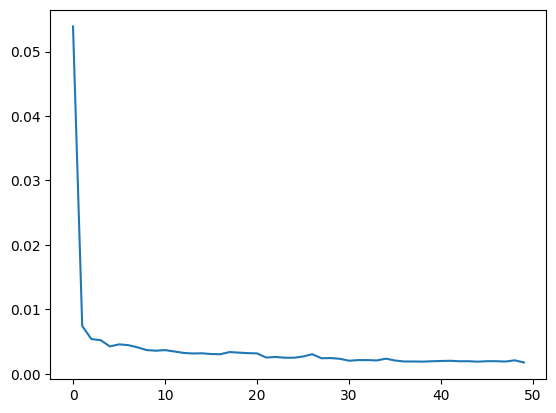

In [556]:
loss_per_epoch=model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [557]:
#Trying single prediction
last_input=train_scaled[-lookback:]
last_input=last_input.reshape((1,lookback,train_scaled.shape[1]))
last_input

array([[[0.32269904, 0.27997733, 0.37349459, 0.30444067, 0.2255355 ,
         0.21531606, 0.24156367, 0.20859606, 0.1821641 , 0.15313873,
         0.19258222, 0.21775507, 0.57409599, 0.57618873, 0.57671015,
         0.5815487 , 0.18792455, 0.17698012, 0.2130169 , 0.20941844,
         0.44789632, 0.40591015, 0.46173494, 0.41898822, 0.20385048,
         0.21011133, 0.20493554, 0.22072821],
        [0.32573089, 0.30385548, 0.38793006, 0.33711951, 0.22061424,
         0.20067668, 0.21914426, 0.18900657, 0.21912096, 0.17693006,
         0.21486769, 0.24568108, 0.60982955, 0.60859552, 0.61351054,
         0.60993038, 0.22162254, 0.19764053, 0.23793113, 0.23131884,
         0.42597671, 0.42659569, 0.46697552, 0.46381669, 0.23964543,
         0.20615567, 0.22879539, 0.21606935],
        [0.35565054, 0.31234549, 0.34813499, 0.26321986, 0.20759375,
         0.2054547 , 0.17909072, 0.12848112, 0.24675887, 0.19405695,
         0.20722499, 0.1992131 , 0.6149702 , 0.59968947, 0.49567519,
         0.

In [558]:
predicted=model.predict(last_input)
predicted

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[[0.29028332, 0.29331815]]], dtype=float32)

In [559]:
predicted[0]

array([[0.29028332, 0.29331815]], dtype=float32)

In [560]:
dummy=np.zeros((n_future,train_scaled.shape[1]))
dummy.shape

(1, 28)

In [561]:
dummy[:,0]=predicted[0][:,0]
dummy[:,3]=predicted[0][:,1]

In [562]:
dummy

array([[0.29028332, 0.        , 0.        , 0.29331815, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ]])

In [563]:
predicted_actual=scalar.inverse_transform(dummy)
predicted_actual

array([[23134.90036425, 22131.3       , 21281.45      , 23155.02224315,
        21483.3       , 21637.1       , 21144.75      , 21520.75      ,
         7651.1       ,  7803.15      ,  7597.05      ,  7616.35      ,
        32394.65      , 32833.3       , 32103.8       , 32595.        ,
        32086.35      , 32582.9       , 31511.7       , 31966.1       ,
        22391.45      , 22765.85      , 21863.35      , 22287.65      ,
        52530.        , 53229.75      , 52398.75      , 52825.5       ]])

In [564]:
predicted_open_close=predicted_actual[:,[0,3]]
predicted_open_close

array([[23134.90036425, 23155.02224315]])

In [565]:
#Step 6: Sequential Prediction
test_pred=[]
first_eval_batch=train_scaled[-lookback:]
current_batch=first_eval_batch.reshape((1,lookback,train_scaled.shape[1]))
for i in range(len(test)):
    print(current_batch.shape)
    current_pred=model.predict(current_batch)[0]
    test_pred.append(current_pred)
    print(current_pred.shape)
    dummy=np.zeros((n_future,train_scaled.shape[1]))
    print(dummy.shape)
    dummy[:,0]=current_pred[:,0]
    dummy[:,3]=current_pred[:,1]
    dummy=dummy.reshape(1,dummy.shape[0],dummy.shape[1])
    print(dummy.shape)
    current_batch = np.concatenate([current_batch[:, 1:, :], dummy], axis=1)

(1, 10, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
(1, 2)
(1, 28)
(1, 1, 28)
(1, 10, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
(1, 2)
(1, 28)
(1, 1, 28)
(1, 10, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
(1, 2)
(1, 28)
(1, 1, 28)
(1, 10, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
(1, 2)
(1, 28)
(1, 1, 28)
(1, 10, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
(1, 2)
(1, 28)
(1, 1, 28)
(1, 10, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
(1, 2)
(1, 28)
(1, 1, 28)
(1, 10, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
(1, 2)
(1, 28)
(1, 1, 28)
(1, 10, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
(1, 2)
(1, 28)
(1, 1, 28)
(1, 10, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
(1, 2)
(1, 28)
(1, 1, 28)
(1, 10, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
(1, 2)
(1, 28)
(1, 1, 28)
(1, 10, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
(1, 2)
(1, 28)
(1, 1, 28)
(1, 10, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
(1, 2)
(1, 28)
(1, 1, 28)
(1, 10, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
(1, 2)
(1, 28)
(1, 1, 28)
(1, 10, 28)
1/1 ━━━━━━━━

In [566]:
test.shape

(48, 29)

In [589]:
np.array(test_pred).shape

(48, 1, 2)

In [606]:
test_pred[0]

array([[0.29028332, 0.29331815]], dtype=float32)

In [607]:
dummy=np.zeros((test.shape[0],n_future,test_scaled.shape[1]))
for x in range(test.shape[0]):
    dummy[x][0][0]=test_pred[x][0][0]
    dummy[x][0][3]=test_pred[x][0][1]


In [612]:
dummy.shape

(48, 1, 28)

In [613]:
test.shape

(48, 29)

In [614]:
dummy_squeezed=np.squeeze(dummy,axis=1)
dummy_squeezed

array([[0.29028332, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.16617815, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.1052672 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.01799884, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01799884, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01799884, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], shape=(48, 28))

In [615]:
dummy_squeezed.shape

(48, 28)

In [620]:
#Actual values
test.iloc[:10,[0,1,4]]

,Dates,Open_50,Close_50
200,2025-01-31,23296.75,23508.40
201,2025-02-01,23528.60,23482.15
202,2025-02-03,23319.35,23361.05
203,2025-02-04,23509.90,23739.25
204,2025-02-05,23801.75,23696.30
205,2025-02-06,23761.95,23603.35
206,2025-02-07,23649.50,23559.95
207,2025-02-10,23543.80,23381.60
208,2025-02-11,23383.55,23071.80
209,2025-02-12,23050.80,23045.25


In [616]:
#Predicted values
predict_actual=scalar.inverse_transform(dummy_squeezed)
predict_OpenClose=predict_actual[:,[0,3]]
predict_OpenClose


array([[23134.90036425, 23155.02224315],
       [22590.48200813, 22684.19925051],
       [22323.28087597, 22440.88620456],
       [22150.91166064, 22281.17891055],
       [22043.53787798, 22174.60893913],
       [21980.8575802 , 22104.30408174],
       [21945.8271445 , 22054.31715827],
       [21930.5611546 , 22022.28371944],
       [21928.23353856, 22000.29563201],
       [21932.76147119, 21984.3265711 ],
       [21939.96743959, 21973.54161325],
       [21938.44835216, 21973.92480152],
       [21938.14945032, 21975.17528263],
       [21938.33314982, 21976.27143635],
       [21938.75197681, 21977.19998251],
       [21939.29367051, 21977.85303395],
       [21939.77227624, 21978.28480856],
       [21940.10204796, 21978.54223872],
       [21940.30950043, 21978.67561315],
       [21940.42748907, 21978.73681807],
       [21940.4811069 , 21978.75573786],
       [21940.49046265, 21978.74922687],
       [21940.48769269, 21978.73504308],
       [21940.48078006, 21978.72048815],
       [21940.47

In [633]:
predictions_df=pd.DataFrame(predict_OpenClose)
predictions_df.columns=['Open_Pred','Close_pred']
predictions_df.shape

(48, 2)

In [644]:
test_final=pd.concat([test.reset_index(drop=True),predictions_df.reset_index(drop=True)],axis=1)
test_final=test_final[['Dates','Open_50','Close_50','Open_Pred','Close_pred']]
test_final['Dates']=pd.to_datetime(test_final['Dates'])
test_final.sample()

,Dates,Open_50,Close_50,Open_Pred,Close_pred
32,2025-03-19,22874.95,22907.6,21940.455981,21978.687457
